# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie II : Regréssion Polynomiale**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

NumPy: est une bibliothèque pour langage de programmation Python, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.

pandas: est l'outil standard pour travailler avec des données tabulaires.manipulation des données


In [49]:
import numpy as np
import pandas as pd


data = pd.read_csv('data.csv')  #Lire les données à partir d'un fichier CSV appelé 'data.csv' et les stocker dans un DataFrame pandas appelé 'data'.

data.head() #Afficher les premières lignes du DataFrame 'data'.


,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Weight) et appelez cette variable X.


In [50]:
X = data[['Volume', 'Weight']]   #Sélection des colonnes 'Volume' et 'Weight' à partir du DataFrame 'data'

# Affichage des données stockées dans la variable X
print(X)


    Volume  Weight
0     1000     790
1     1200    1160
2     1000     929
3      900     865
4     1500    1140
5     1000     929
6     1400    1109
7     1500    1365
8     1500    1112
9     1600    1150
10    1100     980
11    1300     990
12    1000    1112
13    1600    1252
14    1600    1326
15    1600    1330
16    1600    1365
17    2200    1280
18    1600    1119
19    2000    1328
20    1600    1584
21    2000    1428
22    2100    1365
23    1600    1415
24    2000    1415
25    1500    1465
26    2000    1490
27    2000    1725
28    1600    1523
29    2000    1705
30    2100    1605
31    2000    1746
32    1600    1235
33    1600    1390
34    1600    1405
35    2500    1395


### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [51]:
y = data['CO2']    #Sélection de la colonne 'CO2' à partir du DataFrame 'data'

# Affichage des données stockées dans la variable y
print(y)

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64


### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [52]:
from sklearn.linear_model import LinearRegression # un algorithme de régression linéaire 
regression_model = LinearRegression()


### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [53]:
regression_model.fit(X,y)


LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [54]:
# Définir le volume et le poids de la voiture pour la prédiction
volume = 1300  
weight = 2300  


test = np.array([[volume, weight]])    #Créer un tableau NumPy contenant les valeurs de volume et de poids pour la prédiction
predicted_CO2 = regression_model.predict(test)   # Effectuer la prédiction en utilisant le modèle de régression (regression_model)


# Afficher la prédiction
print("Prédiction des émissions de CO2 pour une voiture de 1,3 litre et 2300 kg : ", predicted_CO2)

Prédiction des émissions de CO2 pour une voiture de 1,3 litre et 2300 kg :  [107.2087328]


c:\Users\SKIB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [55]:

coefficients = regression_model.coef_
print("Coefficient de volume par rapport au CO2 : ", coefficients[0])
print("Coefficient de poids par rapport au CO2 : ", coefficients[1])





Coefficient de volume par rapport au CO2 :  0.007805257527747128
Coefficient de poids par rapport au CO2 :  0.007550947270300682


# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [57]:
from sklearn.preprocessing import PolynomialFeatures

# Générer des données de régression
x, y = make_regression(n_samples=100, n_features=1, noise=10)

# Modifier les cibles pour les élever au carré
y = y**2

# Transformer les caractéristiques en caractéristiques polynomiales jusqu'au degré 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x= poly_features.fit_transform(x)  
# Afficher la première colonne des caractéristiques transformées
x[:,0]



array([8.85171294e-01, 2.25362592e-02, 2.72970651e-04, 4.25777730e-01,
       9.50875335e-01, 1.43429175e-01, 1.08897344e-04, 4.58540568e-01,
       1.28272411e+00, 2.10841751e+00, 2.37700818e-01, 7.50368271e-01,
       2.77785364e-01, 1.62526575e-01, 8.70640136e-01, 1.47339253e-01,
       4.12031127e-01, 1.69346700e-02, 2.76832616e-01, 7.46665359e-01,
       3.11961297e-03, 1.80225667e-01, 4.05535746e-02, 9.38850558e-01,
       9.44824056e+00, 8.42631344e-03, 1.01317732e+00, 1.73930716e-01,
       2.74826210e-01, 4.95640407e-01, 7.54187628e-02, 4.61900767e+00,
       1.57960309e-01, 3.09755287e+00, 7.81429593e-02, 1.66504273e+00,
       1.30196766e+00, 5.73397594e+00, 1.24287515e-01, 2.13053848e-01,
       2.00736643e-02, 4.31046286e+00, 1.31645738e+00, 5.51732717e-01,
       9.53750724e-02, 5.66806068e-01, 2.03420429e-01, 1.10099225e-01,
       2.25097127e-04, 2.17625481e+00, 3.40313676e+00, 4.09425299e+00,
       2.27360754e-01, 2.45531145e-01, 3.11843539e+00, 9.19156569e-02,
      

### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

(100, 2)

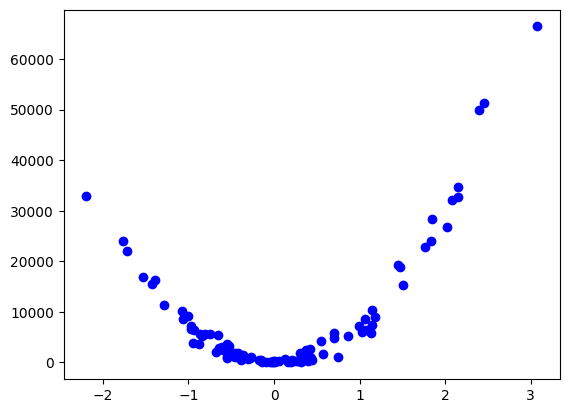

In [58]:
# Afficher un nuage de points avec les données x et y
plt.scatter(x[:,0], y, color='blue')
x.shape


### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [59]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=100, alpha=0.0001)



### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [60]:
model.fit(x, y)

SGDRegressor(max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [61]:
from sklearn.metrics import r2_score

# Calculer les prédictions du modèle
y_pred = model.predict(x)

# Calculer le coefficient de détermination (R²)
r_squared = r2_score(y, y_pred)

# Afficher la précision du modèle
print("Précision du modèle (R²) :", r_squared)




Précision du modèle (R²) : 0.9814352604532299


### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


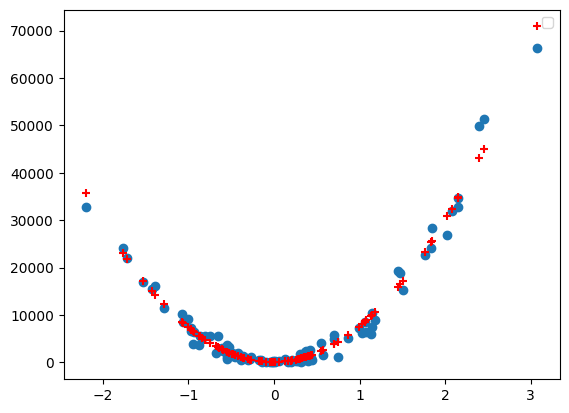

In [62]:

# Afficher un nuage de points avec les valeurs réelles (y) en bleu
plt.scatter(x[:,0],y, marker='o')

# Afficher un nuage de points avec les valeurs prédites (y_pred) en rouge avec des marqueurs '+'
plt.scatter(x[:,0], y_pred, c='red', marker='+')



# Ajouter une légende pour identifier les deux nuages de points
plt.legend()

# Afficher le graphique
plt.show()

### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

Précision du modèle (R²) : 0.9813805865350645


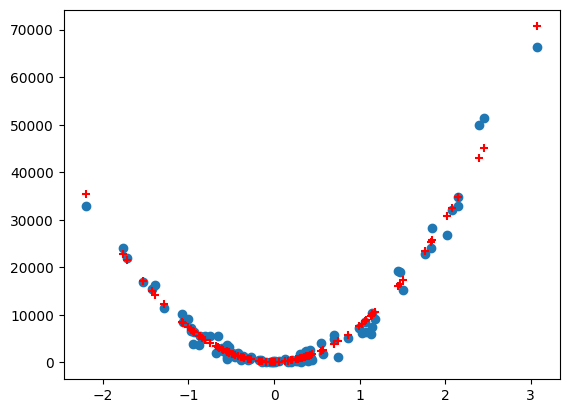

In [63]:
model = SGDRegressor(max_iter=1000, alpha=0.001, random_state=42)
model.fit(x, y)
y_pred = model.predict(x)

# Calculer le coefficient de détermination (R²)
r_squared = r2_score(y, y_pred)

# Afficher la précision du modèle
print("Précision du modèle (R²) :", r_squared)

plt.scatter(x[:,0],y, marker='o')
plt.scatter(x[:,0], y_pred, c='red', marker='+')

